In [7]:
import numpy as np 

def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
    print(f"N is {n}")

    s_x, s_y = np.sum(x), np.sum(y)
    print(f"Sum of x and y are {s_x} & {s_y}")
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
    print(f"Mean of x and y are {m_x} & {m_y}")

    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 

    # calculating regression coefficients 
    b1 = SS_xy / SS_xx 
    b0 = m_y - b1*m_x 

    print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b0, b1))

    sig_x =  np.sqrt((np.sum(x*x) - n*m_x*m_x ) / n)
    sig_y =  np.sqrt((np.sum(y*y) - n*m_y*m_y )/n)
    print("Sigma coefficients:\nsigx = {} \nsigy = {}".format(sig_x, sig_y))

    r = (np.sum(y*x) - n*m_y*m_x) / (n * sig_x * sig_y) 
    r2 = r ** 2
    print(f"R squared value is {r2}")

    return(b0, b1) 


def main(): 
    # observations 
    x = np.array([20,60,100,140,180,220,260,300,340,380]) 
    y = np.array([0.18, 0.37, 0.35, 0.78, 0.56, 0.75, 1.18, 1.36, 1.17, 1.65]) 

    # estimating coefficients 
    b = estimate_coef(x, y) 
    print(f"Equation of line is y = {b[0]} + {b[1]}*x")
    y = b[0] + b[1]*240
    print(f"When velocity is 240 evapouration coeffiecient is {y}")

if __name__ == "__main__": 
    main() 


N is 10
Sum of x and y are 2000 & 8.35
Mean of x and y are 200.0 & 0.835
Estimated coefficients:
b_0 = 0.0692424242424241 
b_1 = 0.0038287878787878794
Sigma coefficients:
sigx = 114.89125293076057 
sigy = 0.46232564281034644
R squared value is 0.9053167998967901
Equation of line is y = 0.0692424242424241 + 0.0038287878787878794*x
When velocity is 240 evapouration coeffiecient is 0.9881515151515152


In [76]:
from scipy.io import arff
import pandas as pd
import pylab
import scipy.stats as stats


data = arff.loadarff('house.arff')
df = pd.DataFrame(data[0])

columns = list(df.columns[0:5])
columns

['size', 'land', 'rooms', 'granite', 'extra_bathroom']

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns].to_numpy())
df.head()

,size,land,rooms,granite,extra_bathroom,price
0,0.655588,-0.701594,1.322876,-0.866025,-1.581139,324500.0
1,0.190182,-0.465958,0.000000,1.154701,0.632456,466000.0
2,1.483576,-0.442040,0.000000,-0.866025,0.632456,425900.0
3,-1.211446,0.639585,-1.322876,1.154701,-1.581139,387120.0
4,-1.536147,-0.590863,-1.322876,-0.866025,0.632456,312100.0


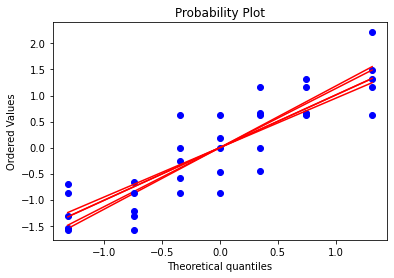

In [78]:
stats.probplot(df['size'], dist="norm", plot=pylab)
stats.probplot(df['land'], dist="norm", plot=pylab)
stats.probplot(df['rooms'], dist="norm", plot=pylab)
stats.probplot(df['granite'], dist="norm", plot=pylab)
stats.probplot(df['extra_bathroom'], dist="norm", plot=pylab)
pylab.show()

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
train = df[df.columns[0:5]]
test = df[df.columns[5]]

In [80]:
lr = LinearRegression()
lr.fit(train, test)
preds = lr.predict(train)

In [81]:
preds

array([328483.93639079, 468595.17201605, 427173.47336172, 383136.06360921,
       321456.63715632, 604388.76437474, 368785.95309117])

In [83]:
# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test, preds))
# The coefficient of determination: 1 is perfect prediction
print('r squared error: %.2f'
      % r2_score(test, preds))

Coefficients: 
 [28717.41497208 40716.00224253  9780.74783933 39361.33726844
 34912.69195355]
Mean squared error: 49020834.71
r squared error: 0.99


Text(0, 0.5, 'Residual')

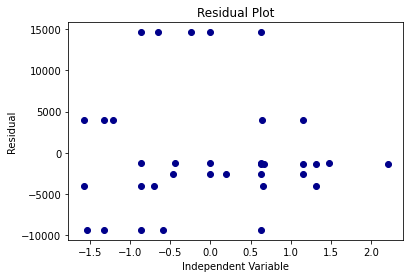

In [84]:
residuals = test - preds
import matplotlib.pyplot as plt
plt.plot(train,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

In [85]:
residuals

0    -3983.936391
1    -2595.172016
2    -1273.473362
3     3983.936391
4    -9356.637156
5    -1388.764375
6    14614.046909
Name: price, dtype: float64

In [63]:
from scipy.io import arff
import pandas as pd
import pylab
import scipy.stats as stats


data = arff.loadarff('../baseball/baseball.arff')
df = pd.DataFrame(data[0])

df.head()

,league,division,position_in_final_league_standings_in_1986,team,number_of_wins_in_1986,number_of_losses_in_1986,attendance_for_home_games_in_1986,attendance_for_away_games_in_1986,1987_average_salary
0,b'N',b'E',b'1',b'N.Y.',108.0,54.0,2767601.0,2176615.0,526899.0
1,b'N',b'E',b'2',b'Phi.',86.0,75.0,1933335.0,1721147.0,540930.0
2,b'N',b'E',b'3',b'St.L.',79.0,82.0,2471974.0,1695738.0,445049.0
3,b'N',b'E',b'4',b'Mon.',78.0,83.0,1128981.0,1926119.0,312959.0
4,b'N',b'E',b'5',b'Chi.',70.0,90.0,1859102.0,1879706.0,556256.0


In [64]:
columns = list(df.columns[4:])
columns

['number_of_wins_in_1986',
 'number_of_losses_in_1986',
 'attendance_for_home_games_in_1986',
 'attendance_for_away_games_in_1986',
 '1987_average_salary']

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns].to_numpy())
df.head()

,league,division,position_in_final_league_standings_in_1986,team,number_of_wins_in_1986,number_of_losses_in_1986,attendance_for_home_games_in_1986,attendance_for_away_games_in_1986,1987_average_salary
0,b'N',b'E',b'1',b'N.Y.',2.697094,-2.682870,1.725739,1.960320,1.049035
1,b'N',b'E',b'2',b'Phi.',0.511913,-0.584235,0.194832,-0.594708,1.177250
2,b'N',b'E',b'3',b'St.L.',-0.183372,0.115310,1.183253,-0.737244,0.301093
3,b'N',b'E',b'4',b'Mon.',-0.282698,0.215245,-1.281186,0.555119,-0.905941
4,b'N',b'E',b'5',b'Chi.',-1.077309,0.914789,0.058612,0.294757,1.317299


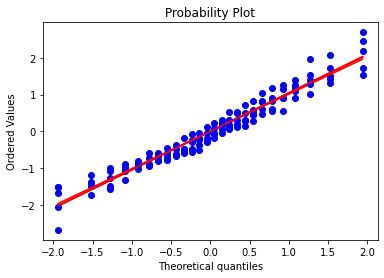

In [66]:
stats.probplot(df['number_of_wins_in_1986'], dist="norm", plot=pylab)
stats.probplot(df['number_of_losses_in_1986'], dist="norm", plot=pylab)
stats.probplot(df['attendance_for_home_games_in_1986'], dist="norm", plot=pylab)
stats.probplot(df['attendance_for_away_games_in_1986'], dist="norm", plot=pylab)
stats.probplot(df['1987_average_salary'], dist="norm", plot=pylab)
pylab.show()